# The Home Advantage: An investigation into the extent of crowd support on Premier league results.

It is widely accepted in the sporting world that the home team tends to benefit from certain advantages. Generally, these factors include crowd support, travel fatigue, tactics, venue familiarity, referee bias and psychological factors. (Fothergill et al. 2012 & Pollard, 1986). Under normal conditions, it is difficult to quantify the impact of each of these variables as many of them interact with each other and typically controlling for them in an authentic environment is not possible (Leite, 2017). The 2019/2020 football season is one of the few exceptions. Due to COVID pandemic, the season was first suspended and then resumed under preconditions with one of the biggest changes being that all games were played behind closed doors without a crowd.

There is a consensus in previous studies on the home advantage in football that crowd support is a contributing factor (Reade, 2009; Pollard, 2008; Fothergill et all, 2012; Leite, 2017; Boyko, 2007). Whilst there seems to be a consensus that the crowd is a contributing factor on teams having an advantage playing at home the specific reason for this phenomenon is unclear (Leite, 2017; Pollard, 2008). However, one area with a body of work with statistically significant results is the impact of bias crowd support on referring decisions (Pollard, 2008; Fothergill et al., 2012, Boyko, 2007). Pollard (2008) went as far to state that, "There is now overwhelming evidence that referee decisions favour the home team. . . The reason for apparent referee bias is thought to be a consequence of crowd support". Whilst it is clear that the academia agrees that crowd support has a wider impact on the home advantage the only area there is considerable proof of the matter is the impact of crowd bias on referring decisions.

Furthermore, another consideration that needs to be considered is the psychological impact of the idea of home advantage on teams. Fothergill et al. (2012) comment on a study on focus groups of players, referees and fans perceived as the significant factors contributing to the home advantage in which the three groups believed that the most significant of these was crowd support and familiarity to the environment. This suggests that even if statistically speaking there is no indication that these factors do have a significant impact on home advantage, there could be psychological factors impacting on a team’s home advantage due to the perception that factors such as crowd support are influencing the game. 

The consensus of previous studies is that apart from the impact of crowd support of referee bias there is a common belief that crowd support does influence the home advantage but a lack of consensus on the mechanisms crowd support influences (i.e., players performance) and how much of an influence crowd support has on games generally.

This investigation will therefore use the unique opportunity of being able to analyse a body of games without crowds to try and provide further insight into if and how much crowds impact games. The hypothesis is that based on current understanding a key component to a team’s home advantage is the home team having the support of the majority of the fans. If this is the case, when fans are not present then there should be some kind of quantifiable decrease in that advantage.  Therefore, the average point total for teams playing at home should drop whilst the average point total for the away team should increase.

The main variables that will be considered in this investigation are points gained at home compared with points gained playing away. This metric of measurement was chosen over comparing home wins against away wins as this approach does not include draws. The methodology for this investigation is to first to analyse the results from 14 seasons of the Premier league from 2006/07 to 2019/2020 and establish the average baseline of points gained at home and away. Then I will investigate the 2019/2020 season in further depth and control for the games that were played with and without a crowd to try and understand if there is a statistically significant variation in the games played without a crowd.


## Premier League Data

My original plan was to scrape the fixture results from the official premier league website. Whilst this method would have been a completely valid route for my data collection, after doing some further research I discovered there was already an abundance of CSV sources readily available to download that contained the data I required in an ideal format for dealing with quantitative values.

At the stage of collecting my data, I knew at a minimum I needed the data to included, at the minimum at least a decade worth of data which included identifiers for the season, home goals scored, and away goals scored. Furthermore, I required the 2019/2020 season to show the dates when the games were played so I could differentiate between the games that were played pre- and post-lockdown.

In the end, I settled on three separate data files from open sources. The first having a breakdown of each season from 2006/2007 - 2017/18 sourced from https://www.kaggle.com/zaeemnalla/premier-league, the second covering the season 2018/2019 and the final data set covering the season 2019/2020 with those data files sourced from https://fixturedownload.com/sport/football. The data was cross-checked with the data provided by the official premier league website https://www.premierleague.com/results. Whilst there was more comprehensive data available which included far more variables on each Premier League season as the focus of my research was focusing on the home advantage the main data requirements needed was a data set that contained the results for each fixture whilst indicating what result belonged to the home and away team. The data sets I opted for provides this information in a format that can be manipulated to derive further information if required.

To streamline my work later on I decided the first task required was to merge all the data into a single DataFrame. However, before I carried the task out, I need to clean the data and ensure that all the CSV files were consistently formatted.



In [1]:
import pandas as pd

#imported the csv files that I have uploaded to Jupyter Notebooks

df1 = pd.read_csv('epl_res_06-18.csv')
df2 = pd.read_csv('epl_19.csv')
data_19_20 = pd.read_csv('epl_res_19:20.csv')

In [2]:
# I decided that I would more than likely would want to alter how many columns or rows were visible at any time

pd.set_option('display.max_rows', 2000) # can increase/decrease the max visible rows outputted
pd.set_option('display.max_columns', 1000) # can increase/decrease the max visible rows outputted

In [3]:
# I then checked how the data looked in the output.

#df1
#df2
#data_19_20

When I initially looked at my data, I noticed that 2 of the DataFrames (df2 and data_19_20) had the same variable names for the home and away team column so, I changed the corresponding variable names in df1 to match. I also decided on setting my index to the season column.

In [4]:
# Changes the names of two columns so they match the corresponding varaible name in the other dataframe.
df1.rename(columns={'home_team': 'Home Team', 'away_team': 'Away Team'}, inplace=True) 

# Sets the index as the season column
df1.set_index('season', inplace=True)

In [5]:
# Checked the output of the df1 DataFrame
#df1

Once the df1 DataFrame was formatted, I began manipulating the df2 DataFrame to mirror the formatting of df1.

In [6]:
# Splits the result column into home goals and away goals
df2[['home_goals','Null','away_goals']] = df2.Result.str.split(expand=True)

# Removes the columns that are no longer required
df2.drop(['Round Number', 'Location','Null', 'Result', 'Date'], axis=1, inplace=True)

#creates a new colum and assigns values to that column
df2.loc[:, 'Season'] = '2018-2019'

#Sets the index as the season column
df2.set_index('Season', inplace=True)

#creates a new column with the function defining the result based on goals scored

def fun(result):
    if result['home_goals']>result['away_goals']:   return 'H'
    elif result['home_goals']<result['away_goals']: return 'A'
    else : return 'D'

df2['result'] = df2.apply(fun, axis=1)

In [7]:
# Checked the output of the df2 DataFrame
# df2

With the data_19_20 DataFrame, I realised that I needed to ensure that the season column captured the pre lockdown and post lockdown games. As the season was suspended on the 12th of March any game after that will be split into the post lockdown group. I implemented the following code which replaced to located and replace games played pre and post lockdown with identifiable names.

In [8]:
data_19_20.loc[0:288, 'Date'] = "2019 - 2020 P1" # Updates the values of the data column to show all games pre-lockdown

data_19_20.loc[288:, 'Date'] = "2019 - 2020 P2"  # Updates the values of the data column to show all games post-lockdown

data_19_20.rename(columns={'Date': 'season'}, inplace=True) # Renames the 'Date' column as season

I then applied similiar methods to this DataFrame to the methods used on the df2 DataFrame.

In [9]:
# Splits the result column into home goals and away goals
data_19_20[['home_goals','Null','away_goals']] = data_19_20.Result.str.split(expand=True)

# Removes the columns that are no longer required
data_19_20.drop(['Round Number', 'Location','Null', 'Result'], axis=1, inplace=True)

#Sets the index as the season column
data_19_20.set_index('season', inplace=True)

#creates a new column with the functioning defining the result based on goals scored

def fun(result):
    if result['home_goals']>result['away_goals']:   return 'H'
    elif result['home_goals']<result['away_goals']: return 'A'
    else : return 'D'

data_19_20['result'] = data_19_20.apply(fun, axis=1)

In [10]:
# Checked the output of the df3 DataFrame
data_19_20

,Home Team,Away Team,home_goals,away_goals,result
season,,,,,
2019 - 2020 P1,Liverpool,Norwich,4,1,H
2019 - 2020 P1,West Ham,Man City,0,5,A
2019 - 2020 P1,Bournemouth,Sheffield Utd,1,1,D
2019 - 2020 P1,Burnley,Southampton,3,0,H
2019 - 2020 P1,Crystal Palace,Everton,0,0,D
2019 - 2020 P1,Watford,Brighton,0,3,A
2019 - 2020 P1,Spurs,Aston Villa,3,1,H
2019 - 2020 P1,Leicester,Wolves,0,0,D
2019 - 2020 P1,Newcastle,Arsenal,0,1,A


Now that all the DataFrames have been formatted I concatenated them into a single DataFrame 'data_master'.

In [11]:
# Concatenates the three dataframes into a single dataframe with the variable name data_master
data_master = pd.concat([df1,df2,data_19_20], axis=0) 

The below functions are implemented to create two new columns that contain the home points and away points gained in each match.

In [12]:
# Functions populate two new columns with points earned at home and points earned away

def fun(homepoints):
    if homepoints['home_goals']>homepoints['away_goals']:   return 3
    elif homepoints['home_goals']<homepoints['away_goals']: return 0
    else : return 1

data_master['home_points'] = data_master.apply(fun, axis=1) # Applys function to DataFrame in a new column

def fun(awaypoints):
    if awaypoints['home_goals']>awaypoints['away_goals']:   return 0
    elif awaypoints['home_goals']<awaypoints['away_goals']: return 3
    else : return 1
    
data_master['away_points'] = data_master.apply(fun, axis=1) # Applys function to DataFrame in a new column

In [13]:
# Checked the output of the data_master DataFrame
data_master

,Home Team,Away Team,home_goals,away_goals,result,home_points,away_points
2006-2007,Sheffield United,Liverpool,1,1,D,1,1
2006-2007,Arsenal,Aston Villa,1,1,D,1,1
2006-2007,Everton,Watford,2,1,H,3,0
2006-2007,Newcastle United,Wigan Athletic,2,1,H,3,0
2006-2007,Portsmouth,Blackburn Rovers,3,0,H,3,0
...,...,...,...,...,...,...,...
2019 - 2020 P2,Leicester,Man Utd,0,2,A,0,3
2019 - 2020 P2,Man City,Norwich,5,0,H,3,0
2019 - 2020 P2,Newcastle,Liverpool,1,3,A,0,3
2019 - 2020 P2,Southampton,Sheffield Utd,3,1,H,3,0


Although I need the data_19_20 DataFrame to differentiate between the pre and post lockdown games for the 2019/20 season, this is not required for the data_master dataframe and would in fact create make the seasononal data analysis more complicated.

In [14]:
data_master.reset_index(inplace=True)

data_master['index'] = data_master['index'].replace(["2019 - 2020 P1","2019 - 2020 P2"], "2019-2020")
#Sets the index as the season column
data_master.set_index('index', inplace=True)

After checking the data types of the columns using the .dtypes method, i noticed that the 'home_goals and 'away_goals' were objects. As I would like to carry out some quantatitive analysis on this data further down the line I altered the data type of this columns so that they became integers.

In [15]:
data_master['home_goals'] = data_master['home_goals'].astype(int) #Changes datatype from object to integer
data_master['away_goals'] = data_master['away_goals'].astype(int) #Changes datatype from object to integer

data_master.dtypes # Checks the data types within the dataframe

Home Team      object
Away Team      object
home_goals      int64
away_goals      int64
result         object
home_points     int64
away_points     int64
dtype: object

So that I am able to conduct my analysis on points gained at home compard to points gained away from home, I applied  the homepoints and awaypoints function to the data_19_20_master DataFrame.

In [16]:
data_19_20_master = data_19_20

def fun(homepoints):
    if homepoints['home_goals']>homepoints['away_goals']:   return 3
    elif homepoints['home_goals']<homepoints['away_goals']: return 0
    else : return 1

data_19_20_master['home_points'] = data_19_20_master.apply(fun, axis=1) # Applys function to DataFrame in a new column

def fun(awaypoints):
    if awaypoints['home_goals']>awaypoints['away_goals']:   return 0
    elif awaypoints['home_goals']<awaypoints['away_goals']: return 3
    else : return 1

data_19_20_master['away_points'] = data_19_20_master.apply(fun, axis=1) # Applys function to DataFrame in a new column

In [17]:
# Checked the output of the data_19_20_master DataFrame
#data_19_20_master

## Analysis

Now that the initial datasets have been wrangled into the format required it is ready to be analysed. I wanted to get an overview of the totals for each of the variables by season. I decided that the best way to approach this was to create a new DataFrame from the data_master DataFrame that totalled the variables by season.

In [18]:
# Creates a table that summarises the column values by season

#Creates new variables that totals the information
points_by_season = data_master.groupby(level=[0]).agg({'home_points': 'sum', 'away_points': 'sum'})

season_count = data_master.groupby(level=[0]).result.count().rename('Matches Played').to_frame()

goals_by_season = data_master.groupby(level=[0]).agg({'home_goals': 'sum', 'away_goals': 'sum'})

season_results = pd.crosstab(data_master.index, data_master.result).rename(
    columns={'H': 'Home Wins', 'D': 'Draws', 'A': 'Away Wins'})
season_results.index.name = None

# Creates a new DataFrame with the aggregated totals
seas_tot_df = pd.concat([season_count, season_results, points_by_season, goals_by_season], axis=1) \
  .rename(columns={'home_points': 'Home Points', 'away_points': 'Away Points', 'home_goals': 'Home Goals',
                   'away_goals': 'Away Goals',})

In [19]:
# Checks the output of the agg_df DataFrame
seas_tot_df

,Matches Played,Away Wins,Draws,Home Wins,Home Points,Away Points,Home Goals,Away Goals
index,,,,,,,,
2006-2007,380,100,98,182,644,398,552,379
2007-2008,380,104,100,176,628,412,581,421
2008-2009,380,110,97,173,616,427,532,410
2009-2010,380,91,96,193,675,369,645,408
2010-2011,380,90,111,179,648,381,617,446
2011-2012,380,116,93,171,606,441,604,462
2012-2013,380,106,108,166,606,426,592,471
2013-2014,380,123,78,179,615,447,598,454
2014-2015,380,115,93,172,609,438,560,415


Now that seas_tot_df DataFrame contained the summed totals for each varaible by season, I created two new varaibles which summed the total points and total goals by season.

In [20]:
# Creates a total points and total goals by season column 
seas_tot_df['Total Points'] = seas_tot_df['Home Points']+seas_tot_df['Away Points']
seas_tot_df['Total Goals'] = seas_tot_df['Home Goals']+seas_tot_df['Away Goals']

I then created percentage variables for each season using the necessary data from the seas_tot_df dataframe.

In [21]:
# Creates percentage columns for wins and points 
seas_tot_df['Home Win %'] = round((seas_tot_df['Home Wins']/seas_tot_df['Matches Played']*100),3,)
seas_tot_df['Away Win %'] = round((seas_tot_df['Away Wins']/seas_tot_df['Matches Played']*100),3,)
seas_tot_df['Home Points %'] = round((seas_tot_df['Home Points']/seas_tot_df['Total Points']*100),3,)
seas_tot_df['Away Points %'] = round((seas_tot_df['Away Points']/seas_tot_df['Total Points']*100),3,)
seas_tot_df['Home Goals %'] = round((seas_tot_df['Home Goals']/seas_tot_df['Total Goals']*100),3,)
seas_tot_df['Away Goals %'] = round((seas_tot_df['Away Goals']/seas_tot_df['Total Goals']*100),3,)

In [22]:
# Checks the output of the agg_df DataFrame
seas_tot_df

,Matches Played,Away Wins,Draws,Home Wins,Home Points,Away Points,Home Goals,Away Goals,Total Points,Total Goals,Home Win %,Away Win %,Home Points %,Away Points %,Home Goals %,Away Goals %
index,,,,,,,,,,,,,,,,
2006-2007,380,100,98,182,644,398,552,379,1042,931,47.895,26.316,61.804,38.196,59.291,40.709
2007-2008,380,104,100,176,628,412,581,421,1040,1002,46.316,27.368,60.385,39.615,57.984,42.016
2008-2009,380,110,97,173,616,427,532,410,1043,942,45.526,28.947,59.060,40.940,56.476,43.524
2009-2010,380,91,96,193,675,369,645,408,1044,1053,50.789,23.947,64.655,35.345,61.254,38.746
2010-2011,380,90,111,179,648,381,617,446,1029,1063,47.105,23.684,62.974,37.026,58.043,41.957
2011-2012,380,116,93,171,606,441,604,462,1047,1066,45.000,30.526,57.880,42.120,56.660,43.340
2012-2013,380,106,108,166,606,426,592,471,1032,1063,43.684,27.895,58.721,41.279,55.691,44.309
2013-2014,380,123,78,179,615,447,598,454,1062,1052,47.105,32.368,57.910,42.090,56.844,43.156
2014-2015,380,115,93,172,609,438,560,415,1047,975,45.263,30.263,58.166,41.834,57.436,42.564


To get a broad statistical overview I applied the .describe method. This method will output useful statistics such as the mean and deviation for each of my variables.

In [23]:
seas_tot_df.describe()

,Matches Played,Away Wins,Draws,Home Wins,Home Points,Away Points,Home Goals,Away Goals,Total Points,Total Goals,Home Win %,Away Win %,Home Points %,Away Points %,Home Goals %,Away Goals %
count,14.0,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,380.0,109.428571,94.785714,175.785714,622.142857,423.071429,586.357143,439.428571,1045.214286,1025.785714,46.259357,28.796786,59.529071,40.470929,57.176071,42.823929
std,0.0,10.881984,11.185008,8.876751,24.037974,26.394826,28.736488,28.540698,11.185008,46.976555,2.335991,2.863634,2.385931,2.385931,1.616669,1.616669
min,380.0,90.000000,71.000000,157.000000,578.000000,369.000000,532.000000,379.000000,1029.000000,931.000000,41.316000,23.684000,55.954000,35.345000,55.263000,38.746000
25%,380.0,104.500000,92.250000,172.000000,608.250000,411.250000,569.250000,416.500000,1040.250000,1006.000000,45.263000,27.499750,57.936250,39.093750,55.898500,42.153000
50%,380.0,109.500000,96.500000,174.500000,615.500000,426.500000,587.000000,450.000000,1043.500000,1043.000000,45.921000,28.815500,58.890500,41.109500,56.946500,43.053500
75%,380.0,116.000000,99.750000,180.500000,640.000000,440.750000,602.500000,458.750000,1047.750000,1063.000000,47.500250,30.526000,60.906250,42.063750,57.847000,44.101500
max,380.0,128.000000,111.000000,193.000000,675.000000,455.000000,645.000000,476.000000,1069.000000,1072.000000,50.789000,33.684000,64.655000,44.046000,61.254000,44.737000


As expected, the analysis shows that the home team enjoys a significant advantage over the way team with an average margin of 19%. However, the initial analysis of the data shows that statistically speaking, the 2019/2020 season as a whole does not show a marginal difference in the points gained at home or away. Whilst the accumulated home point percentage of 58.015% is slightly below the average of 59.529% is well within the deviation of 59.529%±2.386%. The difference in away points accumulated similar when compared to the average with the 19/20 season totalling 41.985% and the average with deviation totalling 40.471%±2.386%. When you compare the 19/20 season to the preceding 18/19 season there is less home advantage in that season. To further reinforce this point the 19/20 season is near identical in the percentage of points gained in home and away games as the 11/12, 13,14 and 14/15 seasons. The graph below shows home points and away points by season with lines that average of those variables across all 14 seasons.

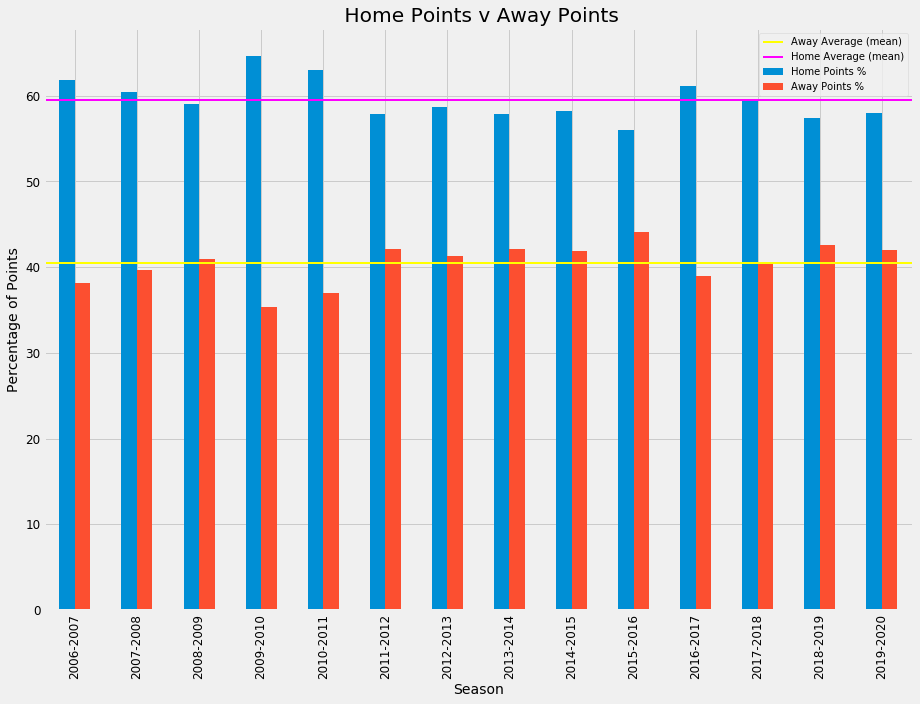

In [24]:
from matplotlib import pyplot as plt
import numpy as np

#print(plt.style.available) # Shows available visualisation styles you can use

plt.style.use("fivethirtyeight") # Selects the style

# Creates a bar chart with the columns Home Points and Away Points
chart_1 = seas_tot_df[['Home Points %','Away Points %']].plot(kind='bar', title =" Home Points v Away Points", 
                                                    figsize=(13, 10), legend=True, fontsize=12)
# Sets the x-axis label and the y-axis label
chart_1.set_xlabel("Season", fontsize=14)
chart_1.set_ylabel("Percentage of Points", fontsize=14)

# Adds line for the Home and Away mean
chart_1.axhline(np.mean(seas_tot_df["Away Points %"]), color="yellow", linewidth= 2, label='Away Average (mean)')
chart_1.axhline(np.mean(seas_tot_df["Home Points %"]), color="magenta", linewidth= 2, label='Home Average (mean)')

#Adds labels to the legend and augments its fontsize
plt.legend(fontsize=10)

plt.grid(True) # Adds a grid
plt.tight_layout()
plt.show() # Outputs the graph


Whilst it may be the case that there seems to be no home advantage when looking at the 19/20 season as a whole, further analysis of the 19/10 may suggest otherwise. As 74% of the games in the 19/20 season was played under 'normal conditions' in that there was crowd support, looking at the season as a whole may skew the analysis. The next step creates a data frame that summarises the same variables as the data_master data frame but for the data_19_20_master that contains the data for the 19/20 season.

In [25]:
# Creates a table that summarises the column values by season

data_19_20_master['home_goals'] = data_19_20_master['home_goals'].astype(int) #Changes datatype from object to integer
data_19_20_master['away_goals'] = data_19_20_master['away_goals'].astype(int) #Changes datatype from object to integer


#Creates new variables that totals the information
points_by_season = data_19_20_master.groupby(level=[0]).agg({'home_points': 'sum', 'away_points': 'sum'})

season_count =data_19_20_master.groupby(level=[0]).result.count().rename('Matches Played').to_frame()

goals_by_season = data_19_20_master.groupby(level=[0]).agg({'home_goals': 'sum', 'away_goals': 'sum'})

season_results = pd.crosstab(data_19_20_master.index, data_19_20_master.result).rename(
    columns={'H': 'Home Wins', 'D': 'Draws', 'A': 'Away Wins'})
season_results.index.name = None

# Creates a new DataFrame with the aggregated totals
season_19_20_agg = pd.concat([season_count, season_results, points_by_season, goals_by_season], axis=1) \
  .rename(columns={'home_points': 'Home Points', 'away_points': 'Away Points', 'home_goals': 'Home Goals',
                   'away_goals': 'Away Goals'})

# Creates a total points and total goals by season column 
season_19_20_agg['Total Points'] = season_19_20_agg['Home Points']+season_19_20_agg['Away Points']
season_19_20_agg['Total Goals'] = season_19_20_agg['Home Goals']+season_19_20_agg['Away Goals']

# Creates percentage columns for wins and points to 3 decimal places
season_19_20_agg['Home Win %'] = round((season_19_20_agg['Home Wins']/season_19_20_agg['Matches Played']*100),3,)
season_19_20_agg['Away Win %'] = round((season_19_20_agg['Away Wins']/season_19_20_agg['Matches Played']*100),3,)
season_19_20_agg['Home Points %'] = round((season_19_20_agg['Home Points']/season_19_20_agg['Total Points']*100),3,)
season_19_20_agg['Away Points %'] = round((season_19_20_agg['Away Points']/season_19_20_agg['Total Points']*100),3,)
season_19_20_agg['Home Goals %'] = round((season_19_20_agg['Home Goals']/season_19_20_agg['Total Goals']*100),3,)
season_19_20_agg['Away Goals %'] = round((season_19_20_agg['Away Goals']/season_19_20_agg['Total Goals']*100),3,)

In [26]:
# Checks the output of the season_19_20_agg DataFrame
season_19_20_agg

,Matches Played,Away Wins,Draws,Home Wins,Home Points,Away Points,Home Goals,Away Goals,Total Points,Total Goals,Home Win %,Away Win %,Home Points %,Away Points %,Home Goals %,Away Goals %
season,,,,,,,,,,,,,,,,
2019 - 2020 P1,288,87,72,129,459,333,434,350,792,784,44.792,30.208,57.955,42.045,55.357,44.643
2019 - 2020 P2,92,29,20,43,149,107,142,108,256,250,46.739,31.522,58.203,41.797,56.800,43.200


In [27]:
season_19_20_agg.describe()

,Matches Played,Away Wins,Draws,Home Wins,Home Points,Away Points,Home Goals,Away Goals,Total Points,Total Goals,Home Win %,Away Win %,Home Points %,Away Points %,Home Goals %,Away Goals %
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,190.000000,58.000000,46.000000,86.000000,304.000000,220.000000,288.00000,229.000000,524.000000,517.000000,45.765500,30.865000,58.079000,41.921000,56.078500,43.921500
std,138.592929,41.012193,36.769553,60.811183,219.203102,159.806133,206.47518,171.119841,379.009235,377.595021,1.376737,0.929138,0.175362,0.175362,1.020355,1.020355
min,92.000000,29.000000,20.000000,43.000000,149.000000,107.000000,142.00000,108.000000,256.000000,250.000000,44.792000,30.208000,57.955000,41.797000,55.357000,43.200000
25%,141.000000,43.500000,33.000000,64.500000,226.500000,163.500000,215.00000,168.500000,390.000000,383.500000,45.278750,30.536500,58.017000,41.859000,55.717750,43.560750
50%,190.000000,58.000000,46.000000,86.000000,304.000000,220.000000,288.00000,229.000000,524.000000,517.000000,45.765500,30.865000,58.079000,41.921000,56.078500,43.921500
75%,239.000000,72.500000,59.000000,107.500000,381.500000,276.500000,361.00000,289.500000,658.000000,650.500000,46.252250,31.193500,58.141000,41.983000,56.439250,44.282250
max,288.000000,87.000000,72.000000,129.000000,459.000000,333.000000,434.00000,350.000000,792.000000,784.000000,46.739000,31.522000,58.203000,42.045000,56.800000,44.643000


The chart below visualises the home and away points gained in the pre-lockdown part of the season with those gained in the post-lockdown part of the season. It also highlights the averages for both those variables for the seasons in the other data set.

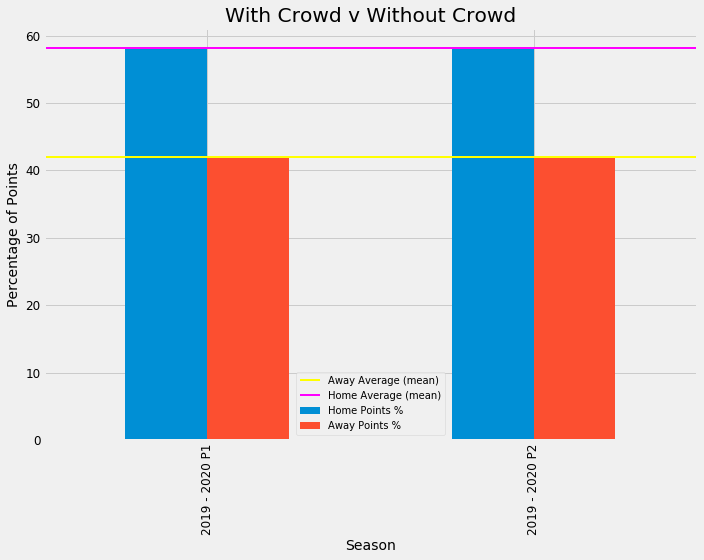

In [28]:
plt.style.use("fivethirtyeight") # Selects the style

# Creates a bar chart with the columns Home Points and Away Points
chart_2 = season_19_20_agg[['Home Points %','Away Points %']].plot(kind='bar', title ="With Crowd v Without Crowd", 
                                                    figsize=(10, 8), legend=True, fontsize=12)
# Sets the x-axis label and the y-axis label
chart_2.set_xlabel("Season", fontsize=14)
chart_2.set_ylabel("Percentage of Points", fontsize=14)

# Adds line for the Home and Away mean
chart_2.axhline(np.mean(season_19_20_agg["Away Points %"]), color="yellow", linewidth= 2, label='Away Average (mean)')
chart_2.axhline(np.mean(season_19_20_agg["Home Points %"]), color="magenta", linewidth= 2, label='Home Average (mean)')

#Adds labels to the legend and augments its fontsize
plt.legend(fontsize=10)

plt.grid(True) # Adds a grid
plt.tight_layout()
plt.show() # Outputs the graph

## Discussion

Further analysis of 2019-2020 season indicates that no statistically significant difference existed between home and away points gained when crowds were present compared to when they were not. Analysis of the seasons from 2006 – 2019 found, that the average home points were 59.529%±2.386% and the average away points 40.471%±2.386%. Both averages of 2019-2020 when controlled for crowd support are not significantly different from those averages. The average home points for home teams playing with a crowd in 2019 – 2020 was 57.955% and the average home points gained without a crowd was 58.203%. Furthermore, a similar inference can be made regarding the away points. The average away points for away teams playing with a crowd in 2019 – 2020 was 42.045% and the average away points gained without a crowd was 41.797%. The data and the analysis done in this study contradict the original hypothesis.  The hypothesis stated that a key component to a team’s home advantage is the home team having the support of the majority of the fans. However, the statistical analysis suggests that this may not be the case as there is no significant differenct in points gained 
by home teams when fans are present compared to when they are not.

Apart from the COVID pandemic, the 2019 – 2020 season had another significant difference to the preceding seasons in the data set, the introduction of the virtual assistant referee (VAR). The introduction of VAR was to ensure that any clear and obvious errors by the officials such as red cards, penalties, and disallowed goals were reviewed to ensure the correct decision had been made. As a wealth of previous studies (Pollard, 2008; Fothergill et al., 2012, Boyko, 2007 suggest one of the measurable effects of crowd support has on the home advantage is its effect on referees. As the major decisions listed above are now reviewed by VAR it is plausible that this in itself has already impacted on the advantage (if any) of crowd bias.

Another caveat in this approach is that it is not specifically controlled for team strength. Whilst over the course of a full season this is not as big of an issue as team strength will balance out it may skew the figures when comparing to parts of season especially as the two sections of the 19/20 season are skewed heavily in favour in the games that were played with crowds (74% with crowds and 26% without). Whilst there may not be a significant change in the results if team strength was controlled for it is worth noting that it is possible.

A potential issue in this analysis is the relatively small dataset used for the control variable of the crowd. As there were only 92 games without a crowd in the 2019/2020 season there is a possibility the result of this statistical analysis will differ if the data set included a larger number of games in the controlled environment. However, A study looking to find if the absence of crowds had any effect on performance and referring decisions in the 2019/2020 season concurs with these findings concluding "that the absence of a partisan home crowd has no effect on the final match scoreline." (Bryson et al.) This study was broader in its scope, looking at games across 17 different countries with 1,498 of the games studied did not have any crowd. This suggests that the dataset used may not be that much of an issue in this approach.

## Conclusion

A general assumption from a literary of previous studies assumed that a significant factor contributing to a team enjoying a home advantage is the contribution of a biased crowd (Reade, 2009; Pollard, 2008; Fothergill et all, 2012; Leite, 2017; Boyko, 2007). However, in these studies, much of the evidence to support that this was the case was essentially presumptuous due to lack of available data that controlled for crowd bias. This study has shown that there is not a statistically significant difference in results when teams play with a crowd or when they play without. This suggests that whilst crowd support may contribute to the home advantage when in combination with other factors, crowd support as a sole factor does not. 

As previously discussed, the results from this study concur with the results of Bryson’s recent study across leagues in 17 countries. They found that there was no statistical evidence to suggest that the lack of crowd support had any negative impact on the home team’s points percentage and no positive impact on the away teams point percentage. Both this study and Bryson’s concur that crowd support might not be as significant as once thought in given teams an advantage when playing at home.

Whilst this could be the case, possible caveats in this approach such as the quantity of data available, the introduction of VAR and controlling for team strength. As these factors themselves have the potential to have an impact on the home advantage they may have weakened the reliability of the conclusions from the analysis.

## Further Work

There is a myriad of different ways that further work could be conducted in this topic area. As mentioned previously the number of games played without a crowd used in this study is 92. A good next step would be to incorporate data from the 20/21 premier league season as a vast majority of the games played are being played without a crowd. With a larger dataset available more reliable statistical inferences would be possible.

Also, in further studies, I would develop stronger methods to control for other possible factors such as team strength. By implementing a method that controls for team strength, the results from any further work should have a higher level of accuracy. Any further work that I conducted would include a model for controlling team strength that, if successful, would nullify one major caveat to the results.

The study by Bryson showed that across the leagues their study looked at that they found that there was a one-third reduction in the away team’s yellow cards when they were playing without a crowd. One interesting route to explore would be to study referee actions in games played in front of a crowd compared to when they play without a crowd and see if there is a significant difference in actions taken that would favour the home team. As VAR has now been introduced decisions for such actions as offsides would be irrelevant but the number of freekicks and yellow cards could be variables of interest. This route could be further explored by not just trying to infer the impact of crowd support on referee bias but on other factors that possibly contribute to the home advantage.

## Bibliography

In addition to the below references I have also utilised the supporting documentation for various packages. 

Boyko, R., Boyko, A. and Boyko, M., 2007. Referee bias contributes to home advantage in English Premiership football. Journal of Sports Sciences, 25(11), pp.1185-1194.

Bryson, A., Dolton, P., Reade, J., Schreyer, D. and Singleton, C., 2020. Experimental effects of an absent crowd on performances and refereeing decisions during Covid-19. SSRN Electronic Journal,.

Fothergill, M., Wolfson, S., Neave, N. and Moss, M., 2012. Perspectives on the home advantage: A comparison of football players, fans and referees. Psychology of Sport and Exercise, [online] 13(3), pp.311-316. Available at: <https://www.researchgate.net/publication/257591792_Perspectives_on_the_home_advantage_A_comparison_of_football_players_fans_and_referees> [Accessed 1 January 2021].

Leite, W., 2017. Home Advantage: Comparison between the Major European Football Leagues. Athens Journal of Sports, 4(1), pp.65-74.


Pollard, R., 1986. Home advantage in soccer: A retrospective analysis. Journal of Sports Sciences, [online] 4(3), pp.237-248. Available at: <https://www.researchgate.net/publication/20272586_Home_advantage_in_soccer_A_retrospective_analysis> [Accessed 1 January 2021].

Pollard, R., 2008. Home Advantage in Football: A Current Review of an Unsolved Puzzle. The Open Sports Sciences Journal, [online] 1(1), pp.12-14. Available at: <https://www.researchgate.net/publication/228632270_Home_Advantage_in_Football_A_Current_Review_of_an_Unsolved_Puzzle>

Aljazeera.com. 2021. English Premier League Set To Return After Coronavirus Break. [online] Available at: <https://www.aljazeera.com/sports/2020/6/17/english-premier-league-set-to-return-after-coronavirus-break> [Accessed 2 January 2021].

Fixturedownload.com. 2019. English Premier League 2018/19 Download Football/Soccer Fixtures, Schedules And Results As CSV, XLSX And ICS | Fixture Download. [online] Available at: <https://fixturedownload.com/sport/football> [Accessed 2 January 2021].

Fixturedownload.com. 2020. English Premier League 2019/20 Download Football/Soccer Fixtures, Schedules And Results As CSV, XLSX And ICS | Fixture Download. [online] Available at: <https://fixturedownload.com/sport/football> [Accessed 2 January 2021].

Kaggle.com. 2021. Premier League. [online] Available at: <https://www.kaggle.com/zaeemnalla/premier-league> [Accessed 2 January 2021].

Premierleague.com. 2021. Premier League Football Scores, Results & Season Archives. [online] Available at: <https://www.premierleague.com/results> [Accessed 3 January 2021].

Stack Overflow. 2021. User Sj293. [online] Available at: <https://stackoverflow.com/users/14860604/sj293> [Accessed 10 January 2021].